In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data=np.genfromtxt("C:/Users/user/Documents/me/college/sem 7/data mining concepts and techinque lab/New folder/iris_numeric.txt",delimiter=',')

In [3]:
def normalise(data):
    X_ = data[:,0:4]
    scaler = StandardScaler()
    X = scaler.fit_transform(X_)
    return X

In [4]:
def isCore(X,idx,eps,mps):
    cnt = 0
    for i in range(0,150):
        dist = 0
        for j in range(0,4):
            dist = dist + (X[idx][j] - X[i][j])**2
        dist = np.sqrt(dist)
        if dist <= eps:
            cnt = cnt + 1
    if cnt >= mps:
        return True
    else:
        return False

In [5]:
def plot(X,label):
    x = []
    y = []
    for i in range(0,150):
        if label[i] == -1:
            x.append(X[i][0])
            y.append(X[i][1])
    plt.scatter(x,y,c="red")
    x = []
    y = []
    for i in range(0,150):
        if label[i] == 1:
            x.append(X[i][0])
            y.append(X[i][1])
    plt.scatter(x,y,c="green")
    x = []
    y = []
    for i in range(0,150):
        if label[i] == 2:
            x.append(X[i][0])
            y.append(X[i][1])
    plt.scatter(x,y,c="blue")
    x = []
    y = []
    for i in range(0,150):
        if label[i] == 3:
            x.append(X[i][0])
            y.append(X[i][1])
    plt.scatter(x,y,c="yellow")
    x = []
    y = []
    for i in range(0,150):
        if label[i] == 4:
            x.append(X[i][0])
            y.append(X[i][1])
    plt.scatter(x,y,c="orange")
    x = []
    y = []
    for i in range(0,150):
        if label[i] == 5:
            x.append(X[i][0])
            y.append(X[i][1])
    plt.scatter(x,y,c="cyan")
    plt.show()

In [6]:
def BFS(X,idx,eps,mps,label,c):
    q = []
    q.append(idx)
    while len(q) > 0:
        nd = q.pop(0)
        if isCore(X,nd,eps,mps) == False:#this point is an outliar
            label[nd] = c
        else:
            label[nd] = c
            for i in range(0,150):
                dist = 0
                for j in range(0,4):
                    dist = dist + (X[nd][j] - X[i][j])**2
                dist = np.sqrt(dist)
                if dist <= eps and label[i] <= 0:
                    q.append(i)
    return label

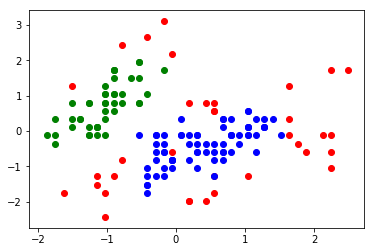

In [7]:
X = normalise(data)
label = np.zeros(150)
eps = 0.5
mps = 5
c = 1
for i in range(0,150):
    if label[i] == 0:
        if isCore(X,i,eps,mps) == False:#this point is an outliar
            label[i] = -1
        else:
            label = BFS(X,i,eps,mps,label,c)
            c = c + 1
plot(X,label)